In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

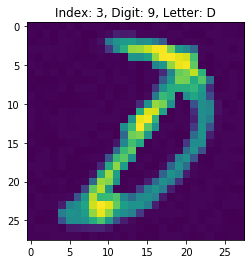

In [3]:
idx = 3
img = train.loc[idx, '0':].values.reshape(28, 28).astype(int)
digit = train.loc[idx, 'digit']
letter = train.loc[idx, 'letter']

plt.title('Index: %i, Digit: %s, Letter: %s'%(idx, digit, letter))
plt.imshow(img)
plt.show()

In [4]:
x1 = train.drop(['id', 'digit', 'letter'], axis=1).values
x1 = x1.reshape(-1, 28, 28, 1)
x1 = x1/255

y_data1 = train['digit']
y1 = np.zeros((len(y_data1), len(y_data1.unique())))
for i, digit in enumerate(y_data1):
    y1[i, digit] = 1

In [36]:
x_letter1 = train['letter'].values
en = OneHotEncoder()
x_letter1 = en.fit_transform(x_letter1).toarray()
x_letter1

ValueError: Expected 2D array, got 1D array instead:
array=['L' 'B' 'L' ... 'A' 'Z' 'Z'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [5]:
from sklearn.model_selection import train_test_split
x_train1, x_val1, y_train1, y_val1 = train_test_split(x1, y1, test_size=0.2, shuffle=True, stratify=y1)
print(x_train1.shape)
print(x_val1.shape)
print(y_train1.shape)
print(y_val1.shape)

(1638, 28, 28, 1)
(410, 28, 28, 1)
(1638, 10)
(410, 10)


In [6]:
x2 = train.drop(['id', 'digit', 'letter'], axis=1).values
x2 = x2.reshape(-1, 28, 28)
x2 = x2/255

y_data2 = train['digit']
y2 = np.zeros((len(y_data2), len(y_data2.unique())))
for i, digit in enumerate(y_data2):
    y2[i, digit] = 1

In [7]:
from sklearn.model_selection import train_test_split
x_train2, x_val2, y_train2, y_val2 = train_test_split(x2, y2, test_size=0.2, shuffle=True, stratify=y2)
print(x_train2.shape)
print(x_val2.shape)
print(y_train2.shape)
print(y_val2.shape)

(1638, 28, 28)
(410, 28, 28)
(1638, 10)
(410, 10)


In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, LSTM, concatenate, Dropout

input1 = Input(shape=(28,28,1))
x1 = Conv2D(64, (3,3), activation='relu', padding='valid')(input1)
x1 = Dropout(0.2)(x1)
x1 = MaxPooling2D((2,2))(x1)
x1 = Conv2D(64, (2,2), activation='relu', padding='valid')(x1)
x1 = Dropout(0.2)(x1)
x1 = MaxPooling2D((2,2))(x1)
x1 = Conv2D(128, (2,2), activation='relu', padding='valid')(x1)
x1 = Dropout(0.2)(x1)
x1 = MaxPooling2D((2,2))(x1)
x1 = Flatten()(x1)
x1 = Dense(500, activation='relu')(x1)
x1 = Dropout(0.2)(x1)
x1 = Dense(100, activation='relu')(x1)

input2 = Input(shape=(28,28))
x2 = LSTM(256, activation='relu', return_sequences=True)(input2)
x2 = LSTM(128, activation='relu')(x2)
x2 = Dropout(0.2)(x2)
x2 = Dense(100)(x2)

merge = concatenate([x1, x2])

x3 = Dense(50)(merge)
output1 = Dense(10, activation='softmax')(x3)

x4 = Dense(50)(merge)
output2 = Dense(10, activation='softmax')(x4)

model = Model(inputs = [input1, input2], outputs = [output1, output2])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 26, 26, 64)   640         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 26, 26, 64)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 13, 13, 64)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', loss_weights = [0.5, 0.5], metrics=['accuracy'])
history = model.fit([x_train1, x_train2], [y_train1, y_train2], validation_data=([x_val1, x_val2], [y_val1, y_val2]), epochs=50, batch_size=64, verbose=1)

Train on 1638 samples, validate on 410 samples
Epoch 1/50
1638/1638 [==============================] - 7s 4ms/sample - loss: 2.3029 - dense_4_loss: 2.3017 - dense_6_loss: 2.3042 - dense_4_accuracy: 0.1129 - dense_6_accuracy: 0.1056 - val_loss: 2.2916 - val_dense_4_loss: 2.2940 - val_dense_6_loss: 2.2887 - val_dense_4_accuracy: 0.1317 - val_dense_6_accuracy: 0.1122
Epoch 2/50
1638/1638 [==============================] - 5s 3ms/sample - loss: 2.2697 - dense_4_loss: 2.2701 - dense_6_loss: 2.2677 - dense_4_accuracy: 0.1319 - dense_6_accuracy: 0.1368 - val_loss: 2.2468 - val_dense_4_loss: 2.2373 - val_dense_6_loss: 2.2587 - val_dense_4_accuracy: 0.1585 - val_dense_6_accuracy: 0.1707
Epoch 3/50
1638/1638 [==============================] - 5s 3ms/sample - loss: 2.1756 - dense_4_loss: 2.1277 - dense_6_loss: 2.2227 - dense_4_accuracy: 0.2375 - dense_6_accuracy: 0.1752 - val_loss: 2.1459 - val_dense_4_loss: 2.0965 - val_dense_6_loss: 2.1956 - val_dense_4_accuracy: 0.2512 - val_dense_6_accuracy: 

1638/1638 [==============================] - 5s 3ms/sample - loss: 0.6105 - dense_4_loss: 0.3229 - dense_6_loss: 0.9037 - dense_4_accuracy: 0.8791 - dense_6_accuracy: 0.6801 - val_loss: 1.4393 - val_dense_4_loss: 0.7606 - val_dense_6_loss: 2.1250 - val_dense_4_accuracy: 0.7537 - val_dense_6_accuracy: 0.3756
Epoch 27/50
1638/1638 [==============================] - 5s 3ms/sample - loss: 0.5260 - dense_4_loss: 0.2800 - dense_6_loss: 0.7760 - dense_4_accuracy: 0.9035 - dense_6_accuracy: 0.7295 - val_loss: 1.4033 - val_dense_4_loss: 0.7276 - val_dense_6_loss: 2.1127 - val_dense_4_accuracy: 0.7415 - val_dense_6_accuracy: 0.3829
Epoch 28/50
1638/1638 [==============================] - 5s 3ms/sample - loss: 0.4735 - dense_4_loss: 0.2451 - dense_6_loss: 0.7006 - dense_4_accuracy: 0.9170 - dense_6_accuracy: 0.7576 - val_loss: 1.6257 - val_dense_4_loss: 0.7890 - val_dense_6_loss: 2.4828 - val_dense_4_accuracy: 0.7512 - val_dense_6_accuracy: 0.3732
Epoch 29/50
1638/1638 [==========================

In [10]:
x_test1 = test.drop(['id', 'letter'], axis=1).values
x_test1 = x_test1.reshape(-1, 28, 28, 1)
x_test1 = x_test1/255

x_test2 = test.drop(['id', 'letter'], axis=1).values
x_test2 = x_test2.reshape(-1, 28, 28)
x_test2 = x_test2/255

#submission['digit'] = np.argmax(model.predict(x_test), axis=1)
y_test1, y_test2 = model.predict([x_test1, x_test2])
y_1 = np.argmax(y_test1, axis=1)
y_2 = np.argmax(y_test2, axis=1)
print(y_1)
print(y_2)

submission = pd.read_csv('data/submission.csv')
submission['digit'] = y_1
pd.to_csv('data/submission.csv', submission)

[6 9 8 ... 6 1 0]
[6 9 3 ... 6 1 5]


In [13]:
submission = pd.read_csv('data/submission.csv')
submission['digit'] = y_1

In [17]:
submission.to_csv('data/submission1.csv', index=False)

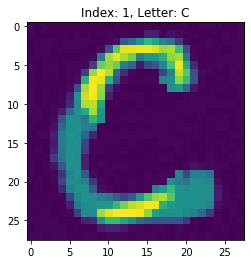

In [12]:
idx = 1
img = test.loc[idx, '0':].values.reshape(28, 28).astype(int)
#digit = test.loc[idx, 'digit']
letter = test.loc[idx, 'letter']

plt.title('Index: %i, Letter: %s'%(idx, letter))
plt.imshow(img)
plt.show()